In [45]:
!pip3 install openpyxl
!pip3 install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [47]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [48]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [54]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
print("Length of WCSS:", len(wcss))

Length of WCSS: 10


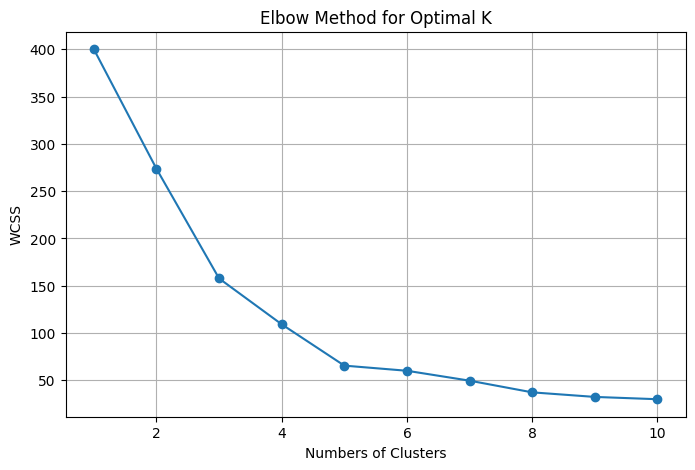

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5,random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

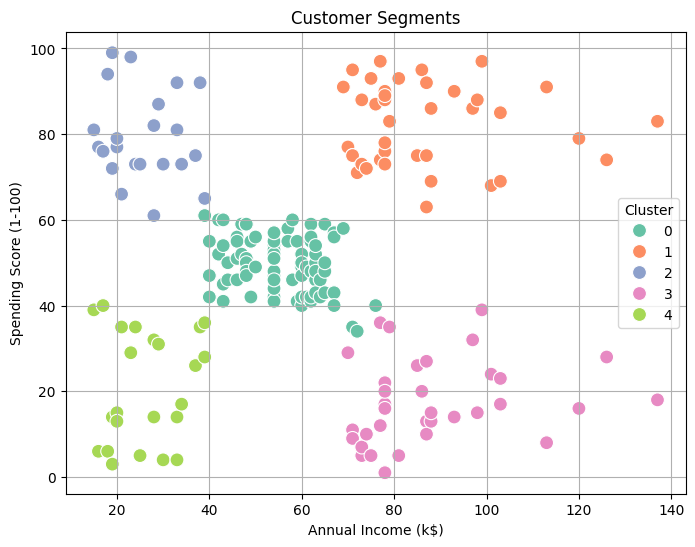

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette = 'Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [58]:
df.to_csv('clustered_mall_customers.csv', index=False)
print("Clustered data saved as clustered_mall_customers.csv")

Clustered data saved as clustered_mall_customers.csv
